<a href="https://colab.research.google.com/github/uyan21/deepLearningStudy/blob/main/GANtest(rmnist).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

GAN generator 생성법

In [112]:
#필요한 라이브러리 불러오기
from keras.datasets import mnist
from tensorflow import keras
from keras.layers import Dense,LeakyReLU,BatchNormalization,UpSampling2D,Conv2D,Reshape
from keras.optimizers import Adam
from keras.models import Sequential
from keras.utils import np_utils
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

In [2]:
seed=0
np.random.seed(seed)
tf.random.set_seed(seed)

In [3]:
#mnist(글씨체)데이터 불러오기
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
#원핫 인코딩
y_train=np_utils.to_categorical(y_train,10)
y_test=np_utils.to_categorical(y_test,10)

In [8]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000, 10)
(10000, 28, 28)
(10000, 10)


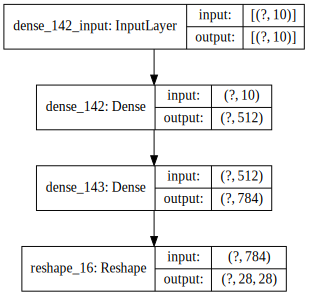

In [166]:
#레이어 모델 생성
model=Sequential()
model.add(Dense(512, input_shape=y_train[0].shape))

model.add(Dense(784))
model.add(Reshape((28,28),input_shape=x_train[0].shape))
adam = Adam(lr=0.01, beta_1=0.5)
model.compile(loss='binary_crossentropy',optimizer=adam)
#model.summary()
%matplotlib inline
s=model_to_dot(model, show_shapes=True,dpi=70).create(prog='dot', format='svg')
SVG(s)


In [170]:
model.fit(y_train,x_train,epochs=1,batch_size=1)

60000/60000 [==============================] - 128s 2ms/step - loss: -241.8683


In [171]:
k=model.predict(y_test)

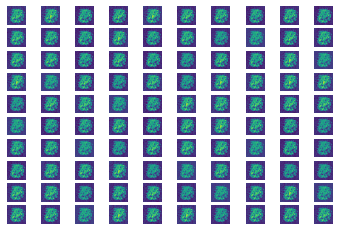

In [172]:
ax=[]
fig = plt.figure()
j=101
for i in range(1,j):
  ax.append(fig.add_subplot(10, 10, i))
  ax[i-1].imshow(k[i])
  ax[i-1].axis('off')
plt.show()


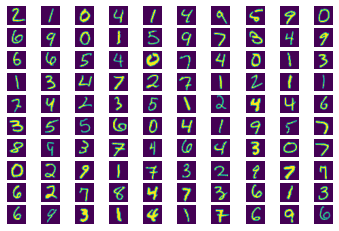

In [173]:
ax=[]
fig = plt.figure()
j=101
for i in range(1,j):
  ax.append(fig.add_subplot(10, 10, i))
  ax[i-1].imshow(x_test[i])
  ax[i-1].axis('off')
plt.show()